# 5SSG2060_Week5_Point Pattern Analysis (PPA)  II
<a href="#This Week's Overview">This Week's Overview</a>

<a href="#Learning Outcomes">Learning Outcomes</a>

<a href="#Get prepared">Get prepared</a>

- <a href="#Density Estimates">Density Estimates</a>

<a href="#Quadrat Based Statistics">Quadrat Based Statistics</a>
- <a href="#Create Windows">Create Windows</a>
- <a href="#Window attributes & methods">Window attributes & methods</a>
- <a href="#Point Intensity Estimates">Point Intensity Estimates</a>
  - <a href="#Minimum bounding box">Minimum bounding box</a>
  - <a href="#Convex hull">Convex hull</a>
- <a href="#Two window testing shapes">Two window testing shapes</a>

<a href="#Heatmap of London Pubs">Heatmap of London Pubs</a>

<a href="#Nearest Neighbors Classification">Nearest Neighbors Classification</a>
- <a href="#Finding Nearest Neighbors">Finding Nearest Neighbors</a> 
- <a href="#Classification Accuracy">Classification Accuracy</a>


<a href="#Kernel Density Estimation (KDE)">Kernel Density Estimation (KDE)</a>
- <a href="#Univariate Distribution in 1D">Univariate Distribution in 1D</a>
- <a href="#Bivariate Distribution in 2D">Bivariate Distribution in 2D</a> 
- <a href="#Others channels to understand KDE">Others channels to understand KDE</a> 
- <a href="#Multivariate KDE">Multivariate KDE<a/> 




- <a href="#Task 1">Task 1</a>
- <a href="#Task 2">Task 2</a>
- <a href="#Task 3">Task 3</a>
- <a href="#Task 4">Task 4</a>
- <a href="#Task 5">Task 5</a>
- <a href="#Task 6">Task 6</a>
- <a href="#Task 7">Task 7</a> (Optional)
- <a href="#Task 8">Task 8</a>
- <a href="#Task 9">Task 9</a>
- <a href="#Task 10">Task 10</a>

## <a id="This Week's Overview">This Week's Overview</a>
Last week, we had practiced point pattern analysis with london pubs data and got the preliminary idea that, various methods for point pattern analysis could be categorized into **density-based methods** and **distance-based methods**.

- *Distance-based methods* are commonly used for interpreting the second order effects – where and what kind of clusters are formed; thus suitable for identifying local patterns.

We had tried Nearest Neighbours Analysis from theoratical view a bit last week, and this week we will continue realize its classification through `Bokeh` plot; in addtion, we will move to Quadrat density estimates, and Kernel Density Estimates (KDE), which falls in 
- *Density-based methods*, they are often used for understanding the first order effects – how many and how often points can be found, and where their spatial mean is; thus good at capturing the global tendency.

These include looking at the density-based methods on measuring point spatial patterns, the corresponding visualizations and how to interpret their utilization. The London pubs data on Week 4 will be used for interpreting **Minimum Bounding Box** and **K-Nearest Neighbours** methods; and the London Airbnb listings data will be the basis for our understanding of **Nearest Neighbours Classification** and **Kernel Density Estimates**.

## <a id="Learning Outcomes">Learning Outcomes</a> 
Upon the completion of this practical, you will get comparative understanding on density-based methods for point pattern analysis, especially the following:
1. Quadrat based statistics and point density estimates
2. Density based visualization by interactive heatmap 
3. Nearest Neighbours Classification
4. Kernel Density Estimates

New libraries such as `Bokeh` and `statsmodels` will be introduced in this practical as well.

## <a id="Get prepared">Get prepared</a>
Set up a "**data**" folder in your directory for this week's practical; 

copy the **London pubs data** we've used for Week 4, and the **Airbnb listings data** for Week 3 into the "**data**" folder for this practical. 

We will import the general libraries at this stage, but import other specific libraries by section to help you better understand their functions. 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal as ps
import libpysal as lps
import matplotlib.pyplot as plt
import pointpats 
from pointpats import PointPattern
import seaborn as sns

import warnings
warnings.simplefilter('ignore') 

### <a id="Density Estimates">Density Estimates</a>
Through your completion of Geocomputation module, you are already familiar with one density estimation technique:**histogram**, by visualizing the definition of data bins, and the tallied number of data points within each bin; however, its choice of binning can have a disproportionate effect on visualization, hence smoother density estimates using various kernels will be powerful in modeling the distribution of points. 

The most commonly used kernel density estimate is Gaussian kernel density estimate, in which each point contributes a Gaussian curve to the total. These algorithms could be found both in [scikit-learn](http://scikit-learn.org/stable/) and in [PySAL](http://pysal.readthedocs.io/en/latest/). In scikit-learn it is implemented in the `classification` section at `sklearn.neighbors.KernelDensity estimator`, which uses the Ball Tree or KD Tree for efficient queries. I had included a map here to sklearn's algorithms and how to navigate them:

<a href="http://scikit-learn.org/stable/tutorial/machine_learning_map/"><img alt="SciKit-Learn Algorithm Map" src="http://scikit-learn.org/stable/_static/ml_map.png"></a>

While in PySAL it will be called from the Python Spatial Analysis Library. PySAL is similarly complex and _also_ has a map to help you navigate its complexities:

![PySAL Map](http://darribas.org/gds_scipy16/content/figs/pysal.png)

But I can't tell you which is the 'right' approach (as I said above) so far, as it all depends on what you're trying to accomplish and how you're _reasoning_ about your problem. 

## <a id="Quadrat Based Statistics">Quadrat Based Statistics</a>

As introduced in lecture, `CRS` process has two prominent characteristics: `Uniform` and `Independent`, which will help us to tell a `non-CSR` process by using Quadrat-based statistics. Against the null hypothesis of a `CRS` process, the expected point intensity $\lambda$ is uniform across the whole study area $\Re$, so the number of points within a sub-region $|A|$ should be $\lambda |A|$. 

If we further define the window $|A|$ as a $m \times n$ rectangular, then for a `CRS` process, the observed number of points within $|A|$ could be compared against the expected point counts using $\chi^2$ test statistic:

$$\chi^2 = \sum^m_{i=1} \sum^n_{j=1} \frac{[x_{i,j}-E(x_{i,j})]^2}{\lambda |A_{i,j}|}$$

* For a $\chi^2$ distribution with $m \times n -1$ degree of freedom, $p$-value could be derived from the $\chi^2$ distribution table; and the the null hypothesis will be rejected at the $95\%$ confidence level if $p$-value is smaller than $0.05$.

* For sampling distribution simulations from a large number of $\chi^2$ test statistics, under the null hypothesis of `CRS` process, if the $\chi^2$ test statistic for the observed point pattern is among the largest $5%$ test statistics, then it is very unlikely to be result of a `CSR` process at $95\%$ confidence level. Hence the null hypothesis is rejected followed by a pseudo $p$-value calculation. 
$$p(\chi^2) = \frac{1+\sum^{nsim}_{i=1}\phi_i}{nsim+1}$$
where 
$$ 
\phi_i =
 \begin{cases}
    1       & \quad \text{if } \psi_i^2 \geq \chi^2 \\
    0       & \quad \text{otherwise } \\
  \end{cases}
$$

$nsim$ is the number of simulations, $\psi_i^2$ is the $\chi^2$ test statistic for each simulated point pattern, $\chi^2$ is the $\chi^2$ test statistic for the observed point pattern, $\phi_i$ is an indicator variable.

In [2]:
# import necessary libraries for this section
from libpysal.cg import shapely_ext
from pointpats import window
from pointpats.window import poly_from_bbox, as_window, Window, to_ccf
import pointpats.quadrat_statistics as qs

### <a id="Create Windows">Create Windows</a>
For Quadrat based statistics, **windows** play important roles in  of point patterns analysis. A window can define the domain for the point pattern, can support corrections for **edge effects**, and can also be used for point density analysis. In the following sections, we will use London pubs data as the basis for point pattern analysis.

In [3]:
# get point data ready for use
f = ps.open('data/London_Pubs.shp')
pp_pubs = PointPattern(np.asarray([pnt for pnt in f]))
f.close()
# general information on london pubs dataset
pp_pubs.summary()

Point Pattern
3337 points
Bounding rectangle [(-0.4990452,51.2952448), (0.2947855,51.683239)]
Area of window: 0.3080017073819411
Intensity estimate for window: 10834.355524730629
          x          y
0 -0.143209  51.523681
1 -0.135599  51.523544
2 -0.194608  51.600840
3 -0.196005  51.599586
4 -0.176505  51.614104


You may find the summary reported the **Bounding Rectangle** and the **Area of window** for the London Pubs point pattern. As we passed it to the `PointPatterns` constructor the 3337 points' data for London pubs, PySAL finds the [minimum bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_rectangle) and uses it as the window. So the area of window is simply the area of the bounding rectangle. 

In [4]:
pp_pubs.window.area

0.3080017073819411

In [5]:
pp_pubs.window.centroid

(-0.10212984999999902, 51.48924189999996)

In [6]:
pp_pubs.window.bbox

[-0.4990452, 51.2952448, 0.2947855, 51.683239]

You may get a bounding box been given from left to bottom, then from right to top.

The `parts` for `window` is a list of polygons. Now let's check the point containment for the `window`. For example, I want to check whether The Edgar Wallace (with lat and lon at -0.112875 and 51.512704) is contained in this `window`, the test will return a boolean output.

In [7]:
pp_pubs.window.contains_point((-0.112875, 51.512704)) # The Edgar Wallace contained in the window

True

In [8]:
pp_pubs.window.parts # We will introduce the concept of parts in later section

[[(-0.4990452, 51.2952448),
  (-0.4990452, 51.683239),
  (0.2947855, 51.683239),
  (0.2947855, 51.2952448),
  (-0.4990452, 51.2952448)]]

The total rows add up to 3337, indicating 3337 pubs as our point targets. What else information you can derive from the summary of london pubs point data? Can you write down your answers to following questions:
1. What are the coordinates for the vertices of bounding rectangle?

2. What is the area of bounding rectangle window?

3. What is the estimated intensity of pubs for this rectangle window?

**Hint**: these will be used to compare with point intensity estimates results.

In [9]:
# Check the attributes of point patterns
pp_pubs.points

x          y
0    -0.143209  51.523681
1    -0.135599  51.523544
2    -0.194608  51.600840
3    -0.196005  51.599586
4    -0.176505  51.614104
5     0.027962  51.592016
6     0.028170  51.576007
7     0.020594  51.583120
8    -0.169763  51.516395
9    -0.221599  51.453407
10   -0.201003  51.544263
11   -0.226697  51.462859
12   -0.177711  51.500393
13   -0.210069  51.469189
14   -0.181125  51.472836
15   -0.104929  51.515484
16   -0.341848  51.508446
17   -0.111743  51.515332
18   -0.119203  51.517235
19   -0.119321  51.516338
20   -0.104335  51.515403
21   -0.099733  51.515074
22   -0.139596  51.492392
23   -0.121147  51.512757
24   -0.078508  51.509682
25   -0.077985  51.511375
26   -0.121939  51.520520
27   -0.122756  51.521087
28   -0.108309  51.515428
29   -0.107164  51.515795
...        ...        ...
3307 -0.173848  51.528348
3308 -0.116934  51.570848
3309 -0.197551  51.507966
3310  0.140426  51.472879
3311 -0.126271  51.581666
3312 -0.135961  51.539111
3313 -0.057927  51.514477
3314 -0.075462  51.507201
3315 -0.047023  51.553389
3316 -0.113245  51.459930
3317  0.007860  51.466777
3318 -0.059111  51.549437
3319 -0.054426  51.549505
3320 -0.072385  51.524800
3321 -0.075354  51.524343
3322 -0.057699  51.553123
3323 -0.152707  51.544028
3324 -0.118339  51.491308
3325 -0.051835  51.413877
3326 -0.053390  51.415987
3327 -0.030293  51.588639
3328 -0.086373  51.550623
3329 -0.075593  51.547644
3330 -0.217819  51.425291
3331 -0.079905  51.551768
3332 -0.166078  51.514554
3333 -0.063851  51.406810
3334 -0.048986  51.537170
3335 -0.055527  51.534627
3336 -0.065378  51.610217

[3337 rows x 2 columns]

### <a id="Point Intensity Estimates">Point Intensity Estimates</a>
The Point intensity is the mean number of event points per unit of area at given point $p_j$, and can be defined as:

$$\lambda(p_j) = \lim \limits_{|\mathbf{A}p_j| \to 0} \left \{ \frac{E(Y(\mathbf{A}p_j)}{|\mathbf{A}p_j|} \right \}   $$

where $\mathbf{A}p_j$ is a region surrounding location $p_j$ with area $|\mathbf{A}p_j|$, and $E(Y(\mathbf{A}p_j)$ is the expected number of event points in $\mathbf{A}p_j$. 

We may recall one of the implications of CSR process last week, that its point intensity is constant in study area $\Re$, which could be expressed as:

$\lambda(p_j) = \lambda(p_{j+1}) = \ldots = \lambda(p_n) = \lambda \ \forall p_j \in \Re$. Thus, if the area of $\Re$ = $|\Re|$, the expected number of event points in the study region is: $E(Y(\Re)) = \lambda |\Re|.$

Last week, you've already been introduced the concept of `Convex Hull` (the smallest convex set that contains a point pattern) and `Minimum Bounding Rectangle (Box)` (the minimum bounding Rectangle, bigger than convex hull) for Shape Analysis. They could fit into the general concept of `window`.

In PySAL, it is estimated by using a geometric object to encode the study region, which is the so-called "window", $W$, as introduced in last practical. The reason for distinguishing between $\Re$ and $W$ is that the latter permits alternative definitions of the bounding object as:

$$\hat{\lambda} = \frac{n}{|W|}$$

where $n$ is the number of points in the *window* $W$, and $|W|$ is the area of $W$. 

You may recap on what we've practiced last week covered a bit on the function of minimum bounding box:

$$\hat{\lambda}_{mbb} = \frac{n}{|W_{mbb}|}$$

where $W_{mbb}$ is the minimum bounding box for the point pattern. Now let's try to understand the definition by using London pubs point dataset.

#### <a id="Minimum bounding box">Minimum bounding box</a> 
Now we will call the minimum bounding box function as `lambda_mbb`, to get the estimated density of pub points within the defined window.

In [10]:
# number of pubs if within minimum bounding box window
pp_pubs.lambda_mbb

10834.355524730629

What you've got? Is it exactly same with the above summary result at 10834.35...? YES, you will find the minimum bounding box for london pubs is exactly the rectangle window of greater London! It means based on current pubs density in London, if we take the whole area of the rectangle bounding window, then the estimated pubs in Greater London will reach at 10834 (or 1 more!), which is more than 3337 pubs so far, and a much densier calculated distribution of pubs will be expected.

Let's further check the coordinates for bounding rectangle from summary by using Google Map. What have you returned with this time? If you find them as $Ripley$ and $Stondon Massey$, then you had successfully locate the left-bottom and right-top for the bounding rectangle, which is also the boundary for Greater London. 

#### <a id="Convex hull">Convex hull</a> 
Besides of the rectangle window, we want a shapely closer window. So we can recall the concept of `convex hull` introduced last week, and express the point intensity as:

$$\hat{\lambda}_{hull} = \frac{n}{|W_{hull}|}$$

where $W_{hull}$ is the convex hull for the point pattern.

In [11]:
# number of pubs if within convex hull window
pp_pubs.lambda_hull

14801.985264248737

As the area of the window decreased by its getting closer to the London boundary, the estimated pubs number reduced to 14802, but still approximately 3 times more than the real value. 

We can conclude that, point density estimation is very sensitive to the **area of study region** (or we term it as "window" here) as introduced in lecture, hence geographical **scale** is cucial when we conduct point pattern analysis.

### <a id="Window attributes & methods">Window attributes & methods</a>
Besides of the simple bounding box, windows could more complicated in realistic scenarios. For example, we need a window with 2 parts and 1 hole in it. How you are going to build it? What challenges for this type of window will bring to related point pattern analysis? Let's start with drawing a simple rectangle to understand the concepts of **window, parts and holes**.

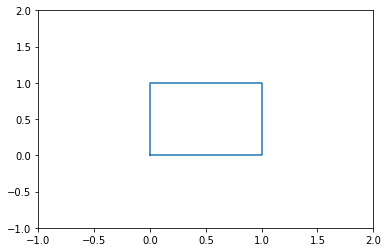

In [12]:
# define the parts and holes within the window by their vertices
parts = [[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)], # define the vertices for part 1
         [(1.5, 1.5), (1.5, 2.0), (2.0, 2.0), (2.0, 1.5)]] # define the vertices for part 2
holes = [[(0.5, 0.5), (0.8, 0.5), (0.8, 0.8), (0.5, 0.8)]] # define the vertices for hole

# get part 1 plotted as a trial
p0 = np.asarray(to_ccf(parts[0]))
plt.plot(p0[:,0], p0[:,1])
plt.xlim(-1,2)
plt.ylim(-1,2) 
plt.show()

(-1, 3)

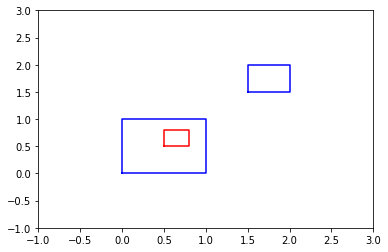

In [13]:
# plot part 1 and part 2 as exterior rings in blue
for part in parts:
    part = np.asarray(to_ccf(part))
    plt.plot(part[:,0], part[:,1], 'b') 
# plot hole associated with the left ring in red
for hole in holes:   
    hole = np.asarray(to_ccf(hole))
    plt.plot(hole[:,0], hole[:,1], 'r') 
plt.xlim(-1,3)
plt.ylim(-1,3)

If we have 6 points with varied locations: 2 outside of the exterior rings, 1 point in the hole ring, and 3 points are contained in either exterior ring, then how to evaluate these containments?

In [14]:
# set up your working framework
from pointpats import Window
window = Window(parts, holes)

(-1, 3)

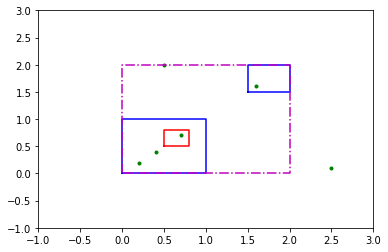

In [15]:
pnts = [(1.6,1.6), (0.4,0.4), (0.7, 0.7), (0.2,0.2), (2.5,0.1), (0.5,2.0)]
for pnt in pnts:
    plt.plot(pnt[0], pnt[1], 'g.') # plot the six points in green

for part in parts:
    part = np.asarray(to_ccf(part))
    plt.plot(part[:,0], part[:,1], 'b') # plot "parts" in blue
for hole in holes:
    hole = np.asarray(to_ccf(hole))
    plt.plot(hole[:,0], hole[:,1], 'r') # plot "hole" in red 

from pointpats.window import poly_from_bbox
poly = np.asarray(poly_from_bbox(window.bbox).vertices)
plt.plot(poly[:,0], poly[:,1], 'm-.') # plot the minimum bounding box in magenta

plt.xlim(-1,3)
plt.ylim(-1,3)

If we want to check which points are contained in the window, we can check whether it will be filtered out by calling `window.filter_contained` function. 

In [16]:
# Check which points are contained in the window
pin = window.filter_contained(pnts)
pin

[array([1.6, 1.6]), array([0.4, 0.4]), array([0.2, 0.2])]

Once you are comfortable with the definitions of **window**, **part** and **hole**, let's fit london pubs data into LSOA boundary and play with them. Firstly, we still need to call `ps.open` function to open the London pubs shapefile. However, you may think that we've already opened it at the beginning of this practical and define it as $"f"$, why we can't simply use $"f"$ to get the coordinates of all points? Try replace the newly defined $"pubs"$ with $"f"$, what will you get then?

In [17]:
pubs = ps.open ('data/London_Pubs.shp') # open London pubs polygon shapefile
points = [shp for shp in pubs] # get x,y coordinates for all the points

Do you still remember how we had loaded the `LDN-LSOAs.shp` data as $"losas"$ last week? We also defined them as `polygon` type and used *cascaded union* to get a "boundary" window. Recall your experience and write your code below:
### <a id="Task 1">Task 1</a>
Load the LDN-LSOAs data and get the boundary window.

In [18]:
# your code here
# open London lsoa polygon shapefile
lsoas = ps.open ('data/LDN-LSOAs.shp') 
# define the polygon shapes from London lsoa data
polys = [shp for shp in lsoas] 
# Create the exterior polygons for Greater London from the union of the polygon shapes
boundary = shapely_ext.cascaded_union(polys)

In [19]:
type(boundary)

libpysal.cg.shapes.Polygon

In [20]:
print(len(polys)) # the count of lsoas in London
print(len(points)) # the count of pubs in London

4835
3337


Let's check if there is any hole in the boundary window.

In [21]:
w = as_window(boundary)
w.holes

[[]]

As the output returns empty, there is no hole in lsoas boundary window. Then we want to know the counts of parts and whether the centroid point in London contained in the boundary window (although we know it should be true as we choose whole London as the window).

In [22]:
len(w.parts)

9

In [23]:
w.contains_point(w.centroid) 

True

Now we are going to create a sequence of windows to carry out a containment test, in order to find which lsoa contains the window centroid. 

We will firstly create a window for each of the individual lsoas, then check each one for the containment of window's centroid. You may find the window (count) with index 4662 is the only one that contains the centroid point.

In [24]:
windows = [as_window(lsoa) for lsoa in polys] # create a window for each of the individual lsoas 
cent_poly = [ (i, lsoa) for i,lsoa in enumerate(windows) if lsoa.contains_point(w.centroid)]
cent_poly # check each lsoa for containment of the window's centroid

[(4662, <pointpats.window.Window at 0x1a1b147470>)]

In [25]:
i, cent_poly = cent_poly[0]
cent_poly.bbox

[530685.4284344892, 179402.14591883362, 531550.3442290183, 180409.0821432257]

### <a id="Two window testing shapes">Two window testing shapes</a> (Optional)
You may observed that the shapes of window very by definition; besides of the real "window" from geographical shapefile, there are mainly two shapes to conduct statistics for window testing: Rectangle and Hexagon. We are familiar with the former shape as it is set by default, so let's start with the **rectangle** firstly.

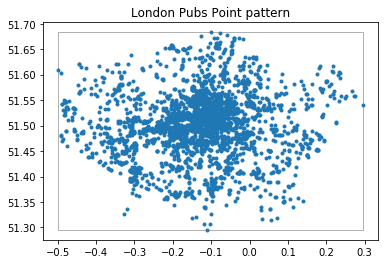

In [26]:
pp_pubs.plot(window= True, title= "London Pubs Point pattern")

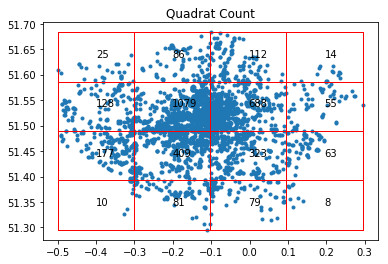

In [27]:
q_r_pubs = qs.QStatistic(pp_pubs,shape= "rectangle",nx = 4, ny = 4)
q_r_pubs.plot() # plot out the quadrat count figure with 4*4 windows

Can you figure out the meanings of number in each window? It shows directly the counts of points in each window.

In [28]:
print('Chi-squared test statistic for the observed point pattern is: '+ str(q_r_pubs.chi2)) 
print('Degree of freedom is: '+str(q_r_pubs.df)) 
print('P-valus for Chi-squared test statistic is: '+str.format('{0:.6f}', q_r_pubs.chi2_pvalue)) # 6 decimals

Chi-squared test statistic for the observed point pattern is: 6241.083308360803
Degree of freedom is: 15
P-valus for Chi-squared test statistic is: 0.000000


Since the $p$-value based on the analytical $\chi^2$ distribution (degree of freedom = 15) is 0.000000, much smaller than 0.05. We might reject the null hypothesis of being a `CSR` process.

Seconday, let's use hexagon quadrats as windows.

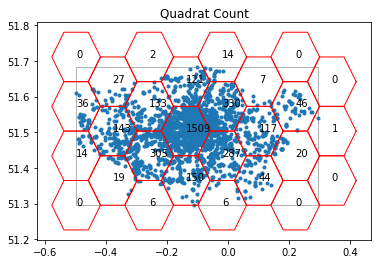

In [29]:
q_h_pubs = qs.QStatistic(pp_pubs,shape= "hexagon",lh =0.08) # lh is the length of hexagon edge, adjustable
q_h_pubs.plot()

### <a id="Task 2">Task 2</a>
Get the statistics testing result for Hexagon window printed below, and conclude whether we should reject the `CSR` hypothesis? Is the distribution of pubs in London random or not?

In [30]:
# your code here
print('Chi-squared test statistic for the observed point pattern is: '+ str(q_h_pubs.chi2)) 
print('Degree of freedom is: '+str(q_h_pubs.df)) 
print('P-valus for Chi-squared test statistic is: '+str.format('{0:.6f}', q_h_pubs.chi2_pvalue)) # 6 decimals

Chi-squared test statistic for the observed point pattern is: 18963.141444411147
Degree of freedom is: 27
P-valus for Chi-squared test statistic is: 0.000000


Since the p-value is 0.00000 much smaller than 0.05, we reject the null hypothesis of CSR, and think the point pattern for London pubs is not random. 

These varied shapes help to build up the sub windows for statistical purpose, and count the numbers of pubs falling in each sub window. This is actually the elementary basis for generating **heatmap**. So has it reminded you any idea of a high quality interactive heatmap for london pubs?

## <a id="Heatmap of London Pubs">Heatmap of London Pubs</a>

### <a id="Task 3">Task 3</a>
Last week, we've tried to get a simple heatmap by calling `scipy`, but it looked not good enough. As we are familiar with using `folium` in the first three weeks' practicals, let's try to work it out in a much fancy way.

In [31]:
# use geopandas to read london pubs shapefile data
pubs_gdf=gpd.read_file('data/london_pubs.shp')

In [32]:
# We call folium to realize interactive heatmap of London pubs
import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster
# Ensure you're handing it floats
pubs_gdf['lat'] = pubs_gdf['latitude'].astype(float)
pubs_gdf['lon'] = pubs_gdf['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = pubs_gdf[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

heatmap_map = folium.Map([51.50632, -0.1271448], zoom_start=12)

# Plot it on the map
hm=plugins.HeatMap(heat_data)
heatmap_map.add_child(hm)
# get the map shown below 
# if it is blank for browser reason, please save it as html file
heatmap_map

Can you try to zoom in/out with the heatmap you've got, and find the densiest part of pubs in London? In addition, what's the rationale of `HeatMap` function in `folium`, especially its density basis? Try google it.

This is straightforward and fancinating, however if we want to know more about the pubs' density in each losa, how we are going to deal with it? 

Think about the "Window" concept, each LSOA could be taken as one sub window defined by administrative boundary, so the measure for density of pubs in each losa is actually to count the number of points (pubs) in each polygon (lsoa) with varied shapes. The starting point should be joining the pubs and lsoas datasets together, by recalling the joining function introduced in week 2 and week 3. Hint: We need to get the columns names listed for both datasets and find the shared column (or rename relevant column for indexing convenience) to realize the data joining.

In [33]:
# Your code here
pubs_gdf.head()

F1                    name   latitude  longitude              lsoa  \
0  0.0           The Green Man  51.523681  -0.143209  Westminster 013A   
1  1.0      The Jeremy Bentham  51.523544  -0.135599       Camden 026D   
2  2.0             The Dignity  51.600840  -0.194608       Barnet 028A   
3  3.0  The Catcher in the Rye  51.599586  -0.196005       Barnet 028A   
4  4.0            The Tally Ho  51.614104  -0.176505       Barnet 019F   

              strNearest  intNearest  bakerloo  circle  hammersmit    ...     \
0  Great Portland Street       104.0         0       0           0    ...      
1          Euston Square        90.0         0       0           0    ...      
2       Finchley Central        93.0         0       0           0    ...      
3       Finchley Central        93.0         0       0           0    ...      
4          Woodside Park       302.0         0       0           0    ...      

   latitude1  longitude1         name1         display_na  zone  total_line  \
0    51.5028     -0.2801    Acton Town    Acton<br />Town   3.0         2.0   
1    51.5143     -0.0755       Aldgate               NULL   1.0         2.0   
2    51.5154     -0.0726  Aldgate East  Aldgate<br />East   1.0         2.0   
3    51.5107     -0.0130    All Saints    All<br />Saints   2.0         1.0   
4    51.5407     -0.2997      Alperton               NULL   4.0         1.0   

   rail                             geometry        lat       lon  
0   0.0  POINT (-0.1432091 51.5236809999999)  51.523681 -0.143209  
1   0.0        POINT (-0.1355991 51.5235442)  51.523544 -0.135599  
2   0.0  POINT (-0.1946078 51.6008403999999)  51.600840 -0.194608  
3   0.0        POINT (-0.1960052 51.5995863)  51.599586 -0.196005  
4   0.0  POINT (-0.1765046 51.6141037999999)  51.614104 -0.176505  

[5 rows x 32 columns]

In [34]:
# use geopandas to read london lsoas shapefile data
lsoas_gdf=gpd.read_file('data/LDN-LSOAs.shp')
lsoas_gdf.head()

lsoa11cd                   lsoa11nm                  lsoa11nmw  objectid  \
0  E01000001        City of London 001A        City of London 001A         1   
1  E01000002        City of London 001B        City of London 001B         2   
2  E01000003        City of London 001C        City of London 001C         3   
3  E01000005        City of London 001E        City of London 001E         4   
4  E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A         5   

      st_areasha   st_lengths  \
0  133320.768872  2291.846072   
1  226191.272990  2433.960112   
2   57302.966538  1142.359799   
3  190738.760504  2167.868343   
4  144195.846857  1935.510354   

                                            geometry  
0  POLYGON ((532105.3302893325 182017.3864794874,...  
1  POLYGON ((532747.0475768285 181793.0423077808,...  
2  POLYGON ((532135.3847144214 182204.2750178791,...  
3  POLYGON ((533808.1704519053 180773.9104895283,...  
4  POLYGON ((545122.084155924 184321.0132629346, ...

Have you decided which column should be used for joining? Yes, the "lsoa" and "lsoa11nm". But it is better to rename the columns for convenience. 

In [35]:
colnames = ['code','lsoa','nmw','id','area','length','geometry']
lsoas_gdf.columns = colnames
lsoas_gdf.head(4)

code                 lsoa                  nmw  id           area  \
0  E01000001  City of London 001A  City of London 001A   1  133320.768872   
1  E01000002  City of London 001B  City of London 001B   2  226191.272990   
2  E01000003  City of London 001C  City of London 001C   3   57302.966538   
3  E01000005  City of London 001E  City of London 001E   4  190738.760504   

        length                                           geometry  
0  2291.846072  POLYGON ((532105.3302893325 182017.3864794874,...  
1  2433.960112  POLYGON ((532747.0475768285 181793.0423077808,...  
2  1142.359799  POLYGON ((532135.3847144214 182204.2750178791,...  
3  2167.868343  POLYGON ((533808.1704519053 180773.9104895283,...

### <a id="Task 4">Task 4</a>
We want to realize the following purposes and you need to replace the question marks with reasonable codes.
1. count the total number of pubs within each lsoa, ensure the data type is integer, and reset the index.
2. join the lsoas and newly generated count datasets together, and save it as shapefile, get it plotted with raw count number.
3. calculate the density of pubs in each lsoa and get it plotted.

In [36]:
# calculating total number of pubs per lsoa
lsoas_pubs_count = pd.DataFrame(pubs_gdf['lsoa'].value_counts().astype(int)).reset_index()
# only leave the 2 columns for plot generating
lsoas_pubs_count.columns = ['lsoa','Numbers']
lsoas_pubs_count.head(4)

lsoa  Numbers
0  City of London 001F      103
1  City of London 001G       40
2     Westminster 018A       36
3     Westminster 013B       36

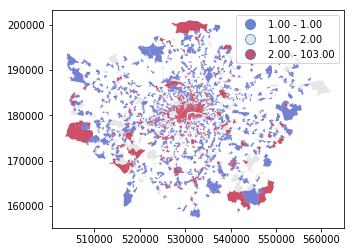

In [37]:
# add a new column of pubs number in each lsoa 
# by join lsoa and pubs through attribute join
join_gdf = lsoas_gdf.merge(lsoas_pubs_count, on='lsoa')
# save this newly joined .csv file into .shp file
join_gdf.to_file(driver='ESRI Shapefile', filename='lsoa_numbers.shp')
# Make a Choropleth map on pubs per lsoa.
join_gdf.plot(column='Numbers', cmap='coolwarm', scheme='quantiles', alpha=0.7, legend=True)

The output looks quite different from the point pattern presented in heatmap, what is the problem?
The output shows us the raw count data in each lsoa, without taking into account of the area of each window, which means if we want the density map, we need to divide the numbers of pubs by area of the lsoa.

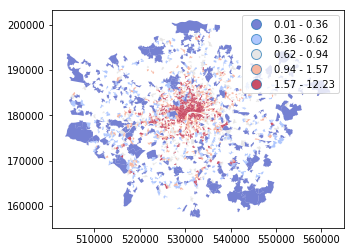

In [38]:
# check the data format, and think of why we need multiple 100000
join_gdf['density'] = join_gdf.apply(lambda row: 100000*row.Numbers / row.area, axis=1)
join_gdf.plot(column='density', cmap='coolwarm', scheme='quantiles', alpha=0.7, legend=True)

Is it much similar with the heatmap point pattern now? 

Since we've spent a lot of time with London pubs data, now let's change to Airbnb listings data for following realizations on: Nearest Neighbors Classification and Kernel Density Estimation (KDE).

##  <a id="Nearest Neighbors Classification">Nearest Neighbors Classification</a>

If we recall the theoretical introduction of nearest neighbors classification last week, it realizes classification by training defined sample data using specified weights. So the configuration of **weights** are crucial in neareast neighbours classification, and we normally use default *uniform weights*, where the value setting of weights keywords is:**weights = 'uniform'** (assigns uniform weights to each query neighbor from a simple majority "vote" of the nearest neighbors). You may also found another definition of weights by distance as **weights = 'distance'** (assigns weights proportional to the inversed distance from the query point). 

Upon the your clear setting of weights, we can call two types of nearest neighbors classifiers from `Scikit-learn`:
1. **K Neighbors Classifier**: based on the $k$ (integer value, specified by you) nearest neighbors of each query point in the training sample, it is the most commonly used technique. In general, larger $k$ can help to suppress the effects from noise, whilst smaller $k$ can help to make the classification boundaries more distinct.
2. **Radius Neighbors Classifier**: based on the number of neighbors within a radius $r$ (fixed, floating-point data, specified by you) of each point in the training sample. Rarely used and specialized for not uniformly sampled data, so you should get the "curse of dimensionality" problem in mind if you need to use it.

For a better understanding and visualization of the classification results, we will hereby use London Airbnb data as the basis for analysis, call `K neighbors classifier` and try to use `Bokeh` for visulization. 

In [39]:
import seaborn as sns
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
rainbow = sns.color_palette(palette='rainbow',n_colors=6)

from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure,show
output_notebook()

Loading BokehJS ...

Bokeh is a powerful data visualization library, you may want to explore its wide application at [Bokeh website](https://bokeh.pydata.org/en/latest/).

In [40]:
# read the dataset for airbnb listings as training dataframe
traindf = pd.read_csv('data/airbnb_listings.csv')
traindf.head()

id                                   name   host_id   host_name  \
0  2336771    by The River Thames. peaceful locat   2030713         Roz   
1  1953238  Sunny Double bedroom - Wifi included!  10097876       Sarah   
2  3981658     Cosy house in a lovely London area   3086158       Verma   
3   375799    Luxury apartment : London/Wimbledon   1889832      Glynis   
4  8882332            Gorgeous room near Kingston  46478469  Jacqueline   

   neighbourhood_group         neighbourhood   latitude  longitude  \
0                  NaN  Kingston upon Thames  51.426077  -0.307018   
1                  NaN  Kingston upon Thames  51.385713  -0.248609   
2                  NaN  Kingston upon Thames  51.388292  -0.244674   
3                  NaN  Kingston upon Thames  51.402958  -0.250436   
4                  NaN  Kingston upon Thames  51.409117  -0.252447   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60               1                 16  2016-07-19   
1     Private room     28               1                  5  2016-08-02   
2     Private room     45               1                  5  2015-07-02   
3  Entire home/apt     80               7                 50  2016-09-19   
4     Private room     50               1                  0         NaN   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.54                               1               365  
1               0.19                               1               137  
2               0.20                               2               365  
3               0.94                               2               355  
4                NaN                               1               365

Can you figure out the room types for Airbnb in London from this dataset?
As you may find, there are 3 types of room types, Entire home/apt, Private room and Shared room, so we will try to plot them by different colors below.

In [41]:
# set up the plot frame, 
# define x axis and y axis scales by the upper and lower limits of corresponding values
p = figure(title="London airbnb room types",y_range=(51.28,51.7),x_range=(-0.6,0.4))
p.xaxis.axis_label = 'longitude'
p.yaxis.axis_label = 'latitude'
# set up latitude and longitude variables for type of Private room
privateLat=traindf['latitude'][traindf['room_type']=='Private room']
privateLong=traindf['longitude'][traindf['room_type']=='Private room']
# set up latitude and longitude variables for type of Shared room
sharedLat=traindf['latitude'][traindf['room_type']=='Shared room']
sharedLong=traindf['longitude'][traindf['room_type']=='Shared room']
# set up latitude and longitude variables for type of Entire home/apt
entireLat=traindf['latitude'][traindf['room_type']=='Entire home/apt']
entireLong=traindf['longitude'][traindf['room_type']=='Entire home/apt']
# define different colors for each type
p.circle(privateLong,privateLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.4,legend='Private room')
p.circle(sharedLong,sharedLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.4,legend='Shared room')
p.circle(entireLong,entireLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.4,legend='Entire home/apt')
show(p, notebook_handle=True)

You may already noticed that some buttons generated together with the plot on the right column. Try click on the buttons, and get the right way to zoom in certain areas in London. Of course, you also need to find your way back with another button. Once you zoomed in, you may find that areas e.g. near East Village, Chelsea, Hell's Kitchen, and Upper East Side, look brighter than the neighbors, indicating higher interest or more requests from Airbnb "hunters". In order to figure out which specific type of Airbnb really contribute to the distribution, we can plot them out by type separately.

In [42]:
# plot private room
p1 = figure(width=500, height=300, title='Private airbnb rooms distribution in London',y_range=(51.28,51.7),x_range=(-0.6,0.4))
p1.circle(privateLong,privateLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.2,line_alpha=0.1,legend='Private room')
# plot shared room
p2 = figure(width=500, height=300, title='Shared airbnb rooms distribution in London',y_range=(51.28,51.7),x_range=(-0.6,0.4))
p2.circle(sharedLong,sharedLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.2,line_alpha=0.1,legend='Shared room')
# plot entire home/apt
p3 = figure(width=500, height=300, title='Entire airbnb homes/apartments distribution in London',y_range=(51.28,51.7),x_range=(-0.6,0.4))
p3.circle(entireLong,entireLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.2,line_alpha=0.1,legend='Entire home/apt')
# get plots show
show(column(p1,p2,p3), notebook_handle=True)

Now you may get some rough ideas on where are the hot airbnbs accummulating, are they normally around some popular venues, siteseeing places, etc.? Does an airbnb receiving high popularity in booking indicate the well acceptance from the customers? If so, how are other neighboring airbnb accommodations? To get the answers, we can use KNN as one of the optimal choices, and starting with creating dataframes from point coordinates data the dependent variable, which is **room_type**.

### <a id="Finding Nearest Neighbors">Finding Nearest Neighbors</a>

In [43]:
# loading the libraries
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp

# define independant variable X with the points' coordinates
# define dependant variable y with room type
X = pd.concat([traindf['latitude'],traindf['longitude']],axis=1)
y = traindf['room_type']
h = .02  # step size in the mesh

# we'll split the training data into testing and training sets
# test_size is the proportion of dataset to include in the test split
# random_state is the count of seeds used by random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45) 
# execute the classification, define k as 9
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

Upon classification, we can further predict the "unseen" room type, and check the capability of predication.

In [44]:
# define the predicted y value for tested X
predVal=neigh.predict(X_test)
# include both the predicted y value and real tested y value
mat=[predVal,y_test]
# read both into a single dataframe
testdf=pd.DataFrame(mat).transpose()

In [45]:
testdf.head()

0                1
0     Private room     Private room
1  Entire home/apt  Entire home/apt
2  Entire home/apt     Private room
3  Entire home/apt  Entire home/apt
4     Private room  Entire home/apt

You will get a dataframe with two columns "0" and "1", let's made them more understandable by renaming the column names into 'prey' and 'y'.

In [46]:
testdf.columns=('prey','y')

### <a id="Classification Accuracy">Classification Accuracy</a>

In [47]:
# check the accuracy in predicting the right room type
# compare predicted y value and the real y value
testdf['diff']=np.where(testdf.prey==testdf.y,1,0)
# calculate the proportion of matched pairs
print('% correct =',sum(testdf['diff'])/len(testdf['diff'])*100)

% correct = 60.69389008289837


As we had the predicting accuracy at 60.69%, we will further build out the [log loss function](http://wiki.fast.ai/index.php/Log_Loss) to see how much error in the predictions.

In [48]:
PredProb=neigh.predict_proba(X_test)
pred=np.asmatrix(PredProb)
pred.shape

(16285, 3)

In [49]:
pred.columns=('Entire home/apt','Private room','Shared room')
s=np.asmatrix(pd.get_dummies(y_test))
def f(x):
    return sp.log(sp.maximum(sp.minimum(x,1-10**-5),10**-5))
f=np.vectorize(f)
predf=f(pred)
mult=np.multiply(predf,s)
print('log loss =',np.sum(mult)/-len(y_test))

log loss = 0.8616267835271345


This log loss is quite high so let's see if we can improve this by increasing our k value. Since, it would be annoying to change the value and run it, I figure it'll be faster to run a for loop through values of $k$ from odd numbers between 3 to 39 (represented by $j$). I also wanted to have at least 5 samples in each $k$ to give us a good average (represented by $i$).

In [50]:
accbig=[]
loglossbig=[]

def f(x):
    return sp.log(sp.maximum(sp.minimum(x,1-10**-5),10**-5))
f=np.vectorize(f)

for j in range(3,40,2):
    logloss=[]
    acc=[]
    for i in range(5):
        #split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
        neigh = KNeighborsClassifier(n_neighbors=j)
        #train classifier
        neigh.fit(X_train, y_train)
        
        #find % predicted correctly for this k
        predVal=neigh.predict(X_test)
        mat=[predVal,y_test]
        testdf=pd.DataFrame(mat).transpose()
        testdf.columns=('prey','y')
        testdf['diff']=np.where(testdf.prey==testdf.y,1,0)
        acc.append(sum(testdf['diff'])/len(testdf['diff']))
        
        #find the logloss for this k
        PredProb=neigh.predict_proba(X_test)
        pred=np.asmatrix(PredProb)
        pred.columns=('Entire home/apt','Private room','Shared room')
        s=np.asmatrix(pd.get_dummies(y_test))
        predf=f(pred)
        mult=np.multiply(predf,s)
        logloss.append(np.sum(mult)/-len(y_test))
    loglossbig.append(np.mean(logloss))
    accbig.append(np.mean(acc))
print(accbig)
print(loglossbig)

[0.5838747313478662, 0.5919680687749463, 0.5962173779551735, 0.6009579367516118, 0.60392999692969, 0.6062879950875038, 0.6074547129260056, 0.6097267424009825, 0.6105495855081363, 0.6112373349708321, 0.6112127724900215, 0.6117899907890697, 0.6117040221062326, 0.612588271415413, 0.6125145839729813, 0.6128093337427079, 0.612109303039607, 0.6130303960700031, 0.6125268652133866]
[1.953342451625741, 1.2280159644227506, 0.9733668058522044, 0.8701729496840013, 0.8195725516442541, 0.7940454423915793, 0.7768702949752807, 0.7675018593619853, 0.7594409260970932, 0.7542074463029194, 0.748835992109313, 0.7448518193409943, 0.7420605541400546, 0.7399067288737482, 0.7383275496979383, 0.7375239720984638, 0.7364859426255213, 0.7354434268659045, 0.7344401000916865]


Text(0.5, 1.0, 'KNN logloss on longitude and latitude')

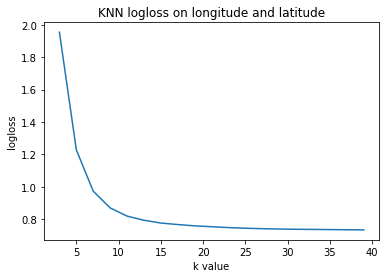

In [51]:
# plot this against every K to see the decrease
plt.plot(range(3,40,2),loglossbig)
plt.ylabel('logloss')
plt.xlabel('k value')
plt.title('KNN logloss on longitude and latitude')

Text(0.5, 1.0, 'KNN prediction on longitude and latitude')

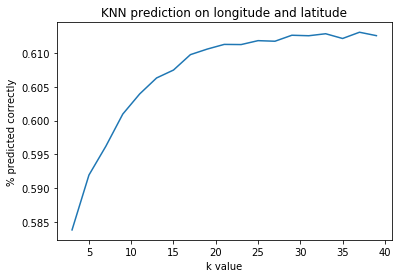

In [52]:
plt.plot(range(3,40,2),accbig)
plt.ylabel('% predicted correctly')
plt.xlabel('k value')
plt.title('KNN prediction on longitude and latitude')

Even though the performance for this isn't amazing, we can see that there are some predictive value that we can use from longtitude and latitude data. We could further check the accuracy of predication at specific $k$ value. For example, 

In [88]:
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 25) 
knn = KNeighborsClassifier(n_neighbors=25)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
pred = knn.predict(X_test)
# evaluate accuracy
print (accuracy_score(y_test, pred))

0.6163340497390236


### <a id='Task 6'>Task 6</a> 
Try to change the value of $k$, have you received different predicted accuracy scores? Please list out the results below:
1. k=3, accuracy score=???
2. k=5, accuracy score=???
3. k=10, accuracy score=???
4. k=15, accuracy score=???
5. k=20, accuracy score=???
6. k=30, accuracy score=???

### <a id='Task 7'>Task 7</a> (Optional)

Price distribution for Airbnb in London (purely statistics), 3 missions to complete.
1. Airbnb price distribution in London from west to east. 

   **Hint**: Scatter plotted the price against longitude calling `seaborn`.

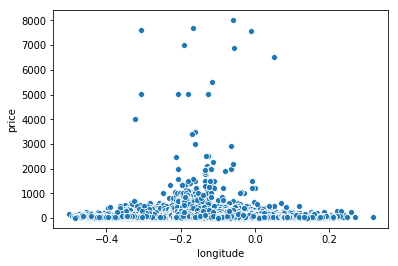

In [56]:
# your code here
sns.scatterplot(traindf['longitude'], traindf['price'])

Can you try to interpret the distribution in a geographcial language then? Your answers below:

**---------------------------------------------------------**

2. Airbnb price distribution in London from south to north.

   **Hint:** Scatter plotted the price against latitude calling `seaborn`.


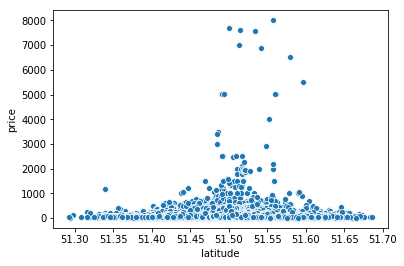

In [57]:
# your code here
sns.scatterplot(traindf['latitude'], traindf['price'])

Can you try to interpret the distribution in a geographcial language then? Your answers below:

**---------------------------------------------------------**

3. The average price and price range for each room type.
   **Hint:** Price statistics by room type, using `groupby`.

In [78]:
traindf.groupby('room_type')['price'].describe().reset_index()

room_type    count        mean         std  min   25%    50%     75%  \
0  Entire home/apt  25285.0  143.211865  172.938505  9.0  85.0  110.0  157.00   
1     Private room  23357.0   50.009762   68.199939  8.0  34.0   44.0   59.00   
2      Shared room    706.0   59.128895  376.145813  8.0  17.0   24.0   35.75   

      max  
0  8006.0  
1  7581.0  
2  7006.0

Can you try to interpret the Output? Your answers below:

**---------------------------------------------------------**

OK, some unbelievable prices pop up, and we want to get rid of these outliers for further analysis. So let's firstly get a general idea of the spatial distribution among defined price ranges, say, below £100, £100-£200, £200-£400, £400-£600 and above £600, and call `Bokeh` to plot again. 

In [84]:
# define your points' coordinates for each price range
Lat100=traindf['latitude'][traindf['price']<100]
Long100=traindf['longitude'][traindf['price']<100]
Lat200=traindf['latitude'][(traindf['price']<200)&(traindf['price']>=100)]
Long200=traindf['longitude'][(traindf['price']<200)&(traindf['price']>=100)]
Lat400=traindf['latitude'][(traindf['price']<400)&(traindf['price']>=200)]
Long400=traindf['longitude'][(traindf['price']<400)&(traindf['price']>=200)]
Lat600=traindf['latitude'][(traindf['price']<600)&(traindf['price']>=400)]
Long600=traindf['longitude'][(traindf['price']<600)&(traindf['price']>=400)]
Latup=traindf['latitude'][(traindf['price']>=600)]
Longup=traindf['longitude'][(traindf['price']>=600)]

In [87]:
p = figure(title="Airbnb prices",y_range=(51.28,51.7),x_range=(-0.6,0.4))
p.xaxis.axis_label = 'latitude'
p.yaxis.axis_label = 'longitude'

# plot points in each price range with different colors
p.circle(Long100,Lat100,size=3,color=rainbow.as_hex()[0],fill_alpha=0.6,line_alpha=0.6,legend='<£100')
p.circle(Long200,Lat200,size=3,color=rainbow.as_hex()[1],fill_alpha=0.6,line_alpha=0.6,legend='£200')
p.circle(Long400,Lat400,size=3,color=rainbow.as_hex()[4],fill_alpha=0.6,line_alpha=0.6,legend='£400')
p.circle(Long600,Lat600,size=3,color=rainbow.as_hex()[5],fill_alpha=0.6,line_alpha=0.6,legend='£600')
p.circle(Latup,Longup,size=3,color=rainbow.as_hex()[3],fill_alpha=0.9,line_alpha=1,legend='up')
p.legend.location = 'top_right'
show(p, notebook_handle=True)

I intentially highlighted the points with price above £600 by higher definition of its point transparency, however, we still can't spotted too much in that category. It indicates that majority of the renting prices are below £600 roughly.

## <a id="Kernel Density Estimation (KDE)">Kernel Density Estimation (KDE)</a> 

A density plot is a smoothed, continuous description of the data distribution, and [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) could be the most typical density plot receiving wide popularity. It draws a continuous curve (the kernel) at each data point and adds all of these curves together to make a smooth density estimation. 

The most often used kernel is a Gaussian, within which the kernel is mathmetically a positive function for `k` and `h`:
<img  height="100" src="kernel function.png">

where `h` as the bandwidth parameter, controlling the tradeoff between bias and variance in the result. Larger bandwidth leads to smoother (i.e. high-bias) density distribution, while smaller bandwidth leads to an unsmooth (i.e. high-variance) density distribution, and finally produces a Gaussian bell curve at each data point. More detailed explaination could be explored from [Kernel Density Estimation](https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation). 

Besides of the common Gaussian Kernel, there are also other 5 kernel forms used in sklearn:
<img  height="100" src="kernel formats .png">

The most common use of KDE is in graphically representing distributions of points. There are many ways to visualize the results of Kernal Density Estimates, e.g. the `seaborn` plot we used last semester and in this practical. In the `seaborn` visualization library, KDE is built in and automatically used to help visualize points in one and two dimensions.

### <a id="Univariate Distribution in 1D">Univariate Distribution in 1D</a>

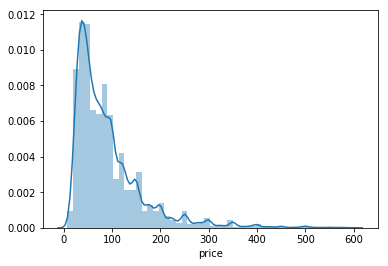

In [55]:
# histogram of price below £600
# your code here
sns.distplot(traindf['price'][traindf['price']<600])

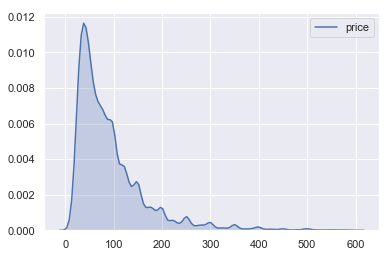

In [61]:
sns.set(color_codes=True)
kdeprice=traindf.price[traindf['price']<600]
# call KDE function in seaborn
sns.kdeplot(kdeprice, shade=True)

If you check the parameters for [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html), you will find the "bw" (bandwidth) parameter controlling how tightly the estimation is fit to the data, similar to the bin size in a histogram. As corresponding to the width of the kernels we plotted above, we may try larger or smaller values instead, to compare with the default behavior.

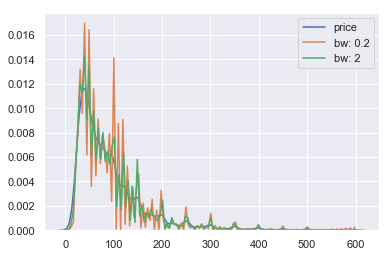

In [62]:
sns.kdeplot(kdeprice)
sns.kdeplot(kdeprice, bw=.2, label='bw: 0.2')
sns.kdeplot(kdeprice, bw=2, label='bw: 2')
plt.legend()

So far for this Airbnb price data, it seems that bandwidth at 2 is much better than that bw at 0.2. The nature of the Gaussian KDE process means that estimation extends past the extreme (largest and smallest) values in the dataset; so we can control where we want to "start" or "stop" the past by defining the "cut" parameter. 

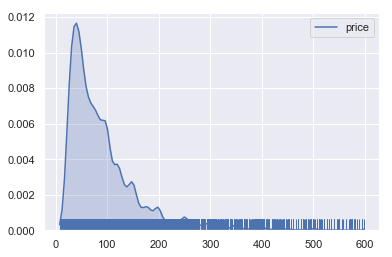

In [92]:
sns.kdeplot(kdeprice, shade=True, cut=0)
sns.rugplot(kdeprice)

The plot cut at "0" as defined, however, you may also spotted that only the drawn curve is affected, but the fit line doesn't change at all.

### <a id="Task 8">Task 8</a>
Pandas dataframe plot we've introduced last semester can also plot KDE curve for univariate distribution. Could you please try to get it done? Further to compare it with the seaborn's kdeplot output.

**Hint**: The sub function under 'plot' is $kde$.

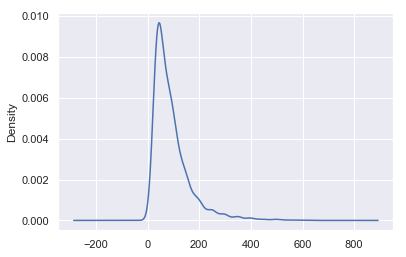

In [64]:
# your code here
ax = kdeprice.plot.kde(bw_method=0.2)

### <a id="Bivariate Distribution in 2D">Bivariate Distribution in 2D</a> 

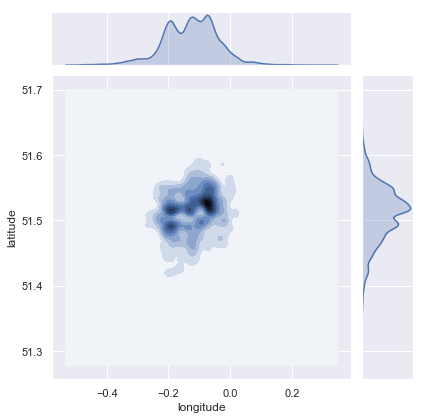

In [65]:
sns.jointplot(x='longitude', y='latitude', data=traindf, kind="kde")

You can also draw a two-dimensional kernel density plot with the `kdeplot` function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the `jointplot` function manages its own figure:

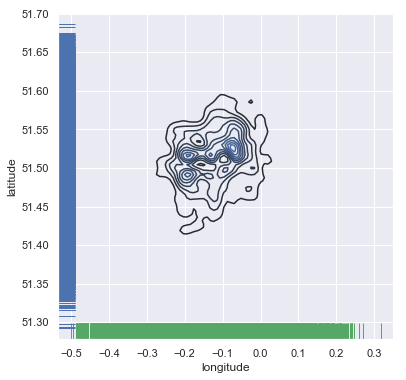

In [66]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(traindf.longitude, traindf.latitude, ax=ax)
sns.rugplot(traindf.longitude, color="g", ax=ax)
sns.rugplot(traindf.latitude, vertical=True, ax=ax)

If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

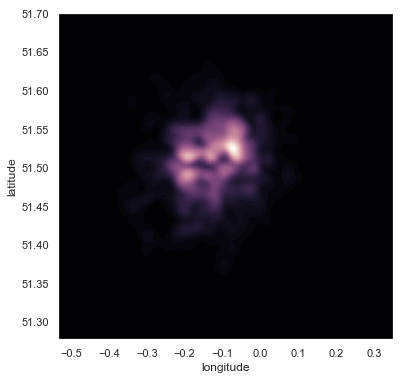

In [67]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(traindf.longitude, traindf.latitude, cmap=cmap, n_levels=60, shade=True)

The `jointplot` function uses a JointGrid to manage the figure. For more flexibility, you may want to draw your figure by using JointGrid directly. `jointplot` returns the JointGrid object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

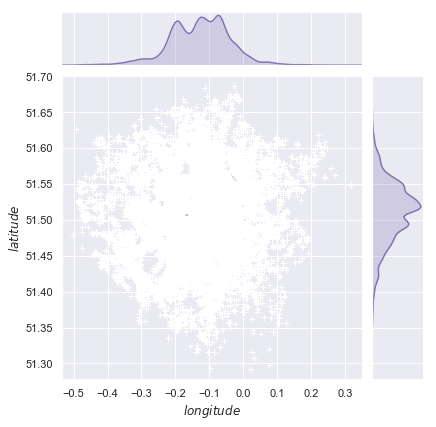

In [68]:
g = sns.jointplot(x='longitude', y='latitude', data=traindf, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$longitude$", "$latitude$")

### <a id="Task 9">Task 9</a> 
Plot bivariate distribution between Airbnb price and corresponding distance to City Center.
1. Calculate the distances between airbnb and city center, which is Charing Cross at (51.5081, -0.1248).
2. Apply what we've covered before to plot your own bivariate distribution.

In [148]:
import math
# define the coordinates of each point
x1 = traindf['latitude']
y1 = traindf['longitude']

# an empty list for distance
distance=[]
# loop to calculate the distance between each point and city center
for i in range(len(x1)):
    xa, ya=x1[i], y1[i]
    distance.append((((xa-51.5081)**2)+((ya+0.1284)**2))**(1/2))
# list the distanc results
distance

[0.19655068217107022,
 0.17154855937546892,
 0.16695347383304493,
 0.16108248730945293,
 0.15869885360748698,
 0.17326418087262027,
 0.2335493889746835,
 0.1583000179724562,
 0.17974684759886228,
 0.19261371440133848,
 0.20629403064667245,
 0.19765344942759855,
 0.21704482277321782,
 0.19460354855117587,
 0.1765815127391021,
 0.17356843504010175,
 0.16581259659388245,
 0.20092374240091146,
 0.19077763239337037,
 0.19675809844357012,
 0.17904722393919154,
 0.1711047348177967,
 0.19036384519768013,
 0.17758825862740207,
 0.18873154468074455,
 0.2000410841576841,
 0.21211376385763372,
 0.19096167460199864,
 0.2022038035564038,
 0.20551806267281125,
 0.1688979541682638,
 0.20678723754231224,
 0.1524214085204927,
 0.19722718703896222,
 0.17218941743039418,
 0.1990814713966907,
 0.19903506158116263,
 0.20209633053439055,
 0.19092807163343933,
 0.18042219897531603,
 0.20207724760486756,
 0.17828380905909796,
 0.15951179487350728,
 0.22654938807485606,
 0.1575811346402216,
 0.18665277428951188

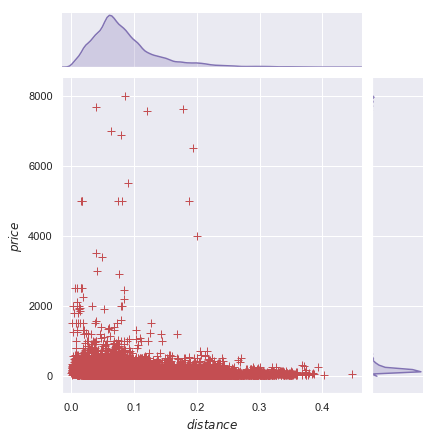

In [155]:
g = sns.jointplot(x=distance, y=traindf['price'], data=traindf, kind="kde", color="m")
g.plot_joint(plt.scatter, c="r", s=50, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$distance$", "$price$")

Can you try to interpret the result below?

**_______________________________________________________________________**

### <a id="Others channels to understand KDE">Others channels to understand KDE</a> 

Just as stated in previous practicals, there are always multiple ways to reach at your goals and get problems solved; so does KDE. Upon your understanding of the statistical rationale of KDE, you may find other methods to fulfill your requests, for example: 
1. `gaussian_kde` in `SciPy`: contains only the common Gaussian Kernel; 
2. `KernelDensity` in `Scikit-learn`: contains six kernels, each of which can be used with one of about a dozen distance metrics, resulting in a very flexible range of effective kernel shapes; 
3. `KDEUnivariate` & `KDEMultivariate` in Statsmodels: contains seven kernels.

We will make use of the aforementioned methods in order for our airbnb data, to get you more understanding of the parameters of KDE: **kernel**, which specifies the shape of the distribution placed at each point; and **bandwidth**, which controls the size of the kernel at each point.

### Univariate KDE in 1D
We will keep using the London Airbnb price data, which are less than £600, as defined in previous section as $kdeprice$, to demonstrate the principles of Kernel Density Estimation in one dimension. Firstly, let's get a rough idea of the data by creating histogram simply with the `plt.hist()` function, and with the density parameter specification to get the height of the bins reflecting probability density. 

In [158]:
X=np.array(kdeprice)
mean=np.mean(X)
var=np.var(X)
std=np.sqrt(var)
X_plot = np.linspace(min(X),max(X), 1000) # set up a sample size at 1000
print(mean,var,std)

91.96494085550827 5273.999870272069 72.62230972829265


You can read the mean value for price from the output and use it as benchmark for this section:

Text(0.5, 1.0, 'Histogram of Airbnb prices distribution')

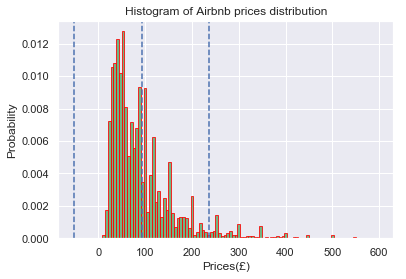

In [159]:
# Compute histogram of Samples
n, bins,patches=plt.hist(X,bins=100,density=True,facecolor='g',edgecolor='red', alpha=0.8)
# try to change the value of bins, figure out the variations
plt.axvline(label='Mean=£92',x=92,linestyle='dashed')
plt.axvline(label='Mean-2sigma=-£53',x=-53,linestyle='dashed')
plt.axvline(label='Mean+2sigma=£237',x=237, linestyle='dashed')
plt.xlabel('Prices(£)')
plt.ylabel('Probability')
plt.title('Histogram of Airbnb prices distribution')

[-20, 620, 0, 800]

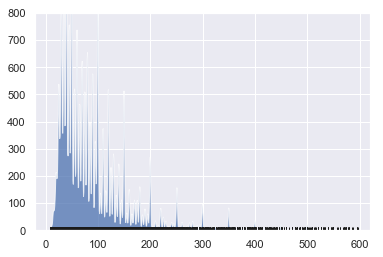

In [160]:
from scipy.stats import norm
X = np.array(kdeprice) # load the data
count = sum(norm(Xi).pdf(X_plot) for Xi in X)  # pdf stands for probability distribution function

plt.fill_between(X_plot, count, alpha=0.75)
plt.plot(X, np.full_like(X, -0.1), '|k', markeredgewidth=1)
plt.axis([-20, 620, 0, 800]) # set the axis limits

(-0.001, 0.014)

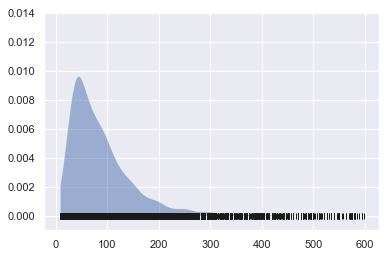

In [161]:
# Note that scipy weights its bandwidth by the covariance of the input data.
# To make the results comparable to the other methods, we use the bandwidth at 0.2
from scipy.stats import gaussian_kde
kde_scipy = gaussian_kde(X, bw_method=0.2)
log_dens_scipy = kde_scipy.evaluate(X_plot)

plt.fill_between(X_plot, log_dens_scipy, alpha=0.5)
plt.plot(X, np.full_like(X, -0.1), '|k', markeredgewidth=1)
plt.ylim(-0.001, 0.014)

In [163]:
from scipy.stats import kurtosis, skew
print("Excess kurtosis of normal distribution ( should be 0):{}".format(kurtosis(X)))
print("Skewness of normal distribution ( should be 0):{}".format(skew(X)))

Excess kurtosis of normal distribution ( should be 0):7.274712606928256
Skewness of normal distribution ( should be 0):2.290757948047361


Now let's turn from `Scipy` to `Scikit-learn`.

(-0.001, 0.014)

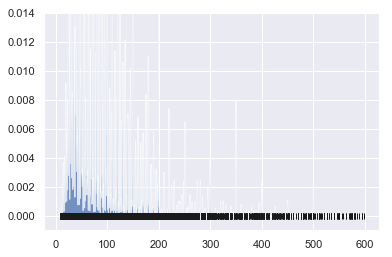

In [164]:
from sklearn.neighbors.kde import KernelDensity
# instantiate and fit the Gaussian KDE model
kde_sklearn = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X[:,None])
# score_samples returns the log of the probability density
log_dens_sklearn = kde_sklearn.score_samples(X_plot[:, None])

plt.fill_between(X_plot, np.exp(log_dens_sklearn), alpha=0.75)
plt.plot(X, np.full_like(X, -0.1), '|k', markeredgewidth=1)
plt.ylim(-0.001, 0.014)

How about the 3rd method in `statsmodels`?

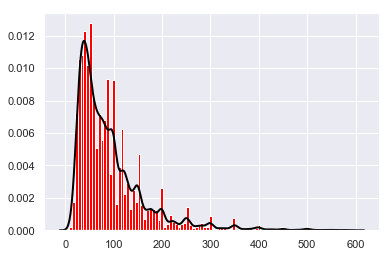

In [165]:
from statsmodels.nonparametric.kde import KDEUnivariate
X_new=X.astype(np.double)  # Try to explain do we need this code? what will happen if you still use variable X?
kde_statsmu = KDEUnivariate(X_new)
kde_statsmu.fit() # Estimate the densities

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.hist(X_new, bins=100, normed=True, color='red')
ax.plot(kde_statsmu.support, kde_statsmu.density, lw=-2, color='black')

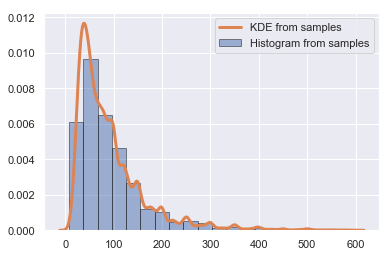

In [187]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
# Plot the histrogram
ax.hist(X_new, bins=20, normed=True, label='Histogram from samples', 
        zorder=5, edgecolor='k', alpha=0.5)
# Plot the KDE as fitted using the default arguments
ax.plot(kde_statsmu.support, kde_statsmu.density, lw=3, label='KDE from samples', zorder=10)
ax.legend(loc='best')

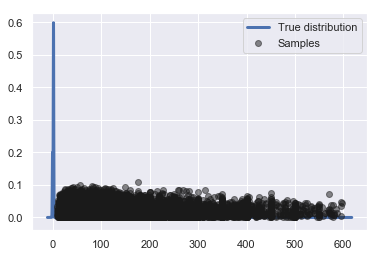

In [185]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
# Plot the true distribution
true_values = (norm.pdf(loc=-1, scale=0.5, x=kde_statsmu.support)*0.25
              + norm.pdf(loc=1, scale=0.5, x=kde_statsmu.support)*0.75)

# different defination of location, scale and weights for 2 normal distribution dataset
ax.plot(kde_statsmu.support, true_values, lw=3, label='True distribution', zorder=15)

# Plot the samples
ax.scatter(X_new, np.abs(np.random.randn(X_new.size))/40, 
           marker='o', color='k', zorder=20, label='Samples', alpha=0.5)
ax.legend(loc='best')
ax.grid(True, zorder=5)

### <a id="Task 10">Task 10</a>
1. Try change the value of bandwidth and get your own plots;
2. Try change the kernel and get your own plots;
3. Could you summarize what are the differences among these methods?

The bandwidth of the kernel can be adjusted using the bw argument. In the following example, a bandwidth of bw=0.2 seems to fit the data well.

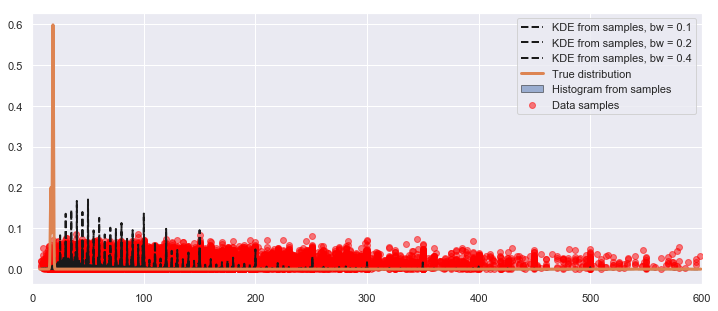

In [192]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(X_new, bins=25, label='Histogram from samples', 
        zorder=5, edgecolor='k', normed=True, alpha=0.5)

# Plot the KDE for various bandwidths
for bandwidth in [0.1, 0.2, 0.4]:
    kde_statsmu.fit(bw=bandwidth) # Estimate the densities
    ax.plot(kde_statsmu.support, kde_statsmu.density, '--', lw=2, color='k', zorder=10,
            label='KDE from samples, bw = {}'.format(round(bandwidth, 2)))

# Plot the true distribution
ax.plot(kde_statsmu.support, true_values, lw=3, label='True distribution', zorder=15)

# Plot the samples
ax.scatter(X_new, np.abs(np.random.randn(X_new.size))/50, 
           marker='o', color='red', zorder=5, label='Data samples', alpha=0.5)

ax.legend(loc='best')
ax.set_xlim([0, 600])
ax.grid(True, zorder=5)

### Optional
Be careful! It takes time!

Since the KDE is a distribution, we can access attributes and methods such as:
`entropy`, `cdf`, `icdf`, `sf` and `cumhazard`. Try to explore the meaning of them only if you want to include in your own project.

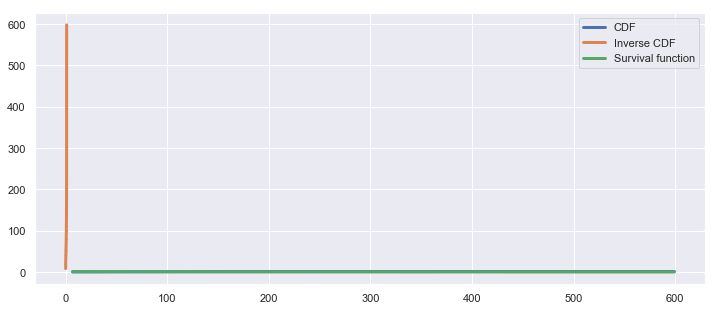

In [198]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde_statsmu.support, kde_statsmu.cdf, lw=3, label='CDF')
ax.plot(np.linspace(0, 1, num = kde_statsmu.icdf.size), kde_statsmu.icdf, lw=3, label='Inverse CDF')
ax.plot(kde_statsmu.support, kde_statsmu.sf, lw=3, label='Survival function')
ax.legend(loc = 'best')
ax.grid(True, zorder=5)

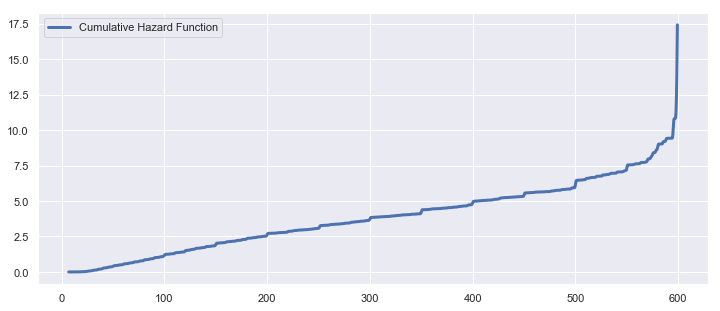

In [195]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde_statsmu.support, kde_statsmu.cumhazard, lw=3, label='Cumulative Hazard Function')
ax.legend(loc = 'best')
ax.grid(True, zorder=5)

### <a id="Multivariate KDE">Multivariate KDE<a/> 
Now we will look at a slightly more sophisticated use of KDE's visualization for the distribution of different  airbnb room types in London distributions. 

In [200]:
# load the AirBnB data into a GeoDataFrame called `sdf` (spatial sample  dataframe)
import os
import shapely
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(traindf.longitude, traindf.latitude)]
crs      = {'init': 'epsg:4326'} # What projection is lat/long?
sdf      = gpd.GeoDataFrame(traindf, crs=crs, geometry=geometry)
sdf      = sdf.to_crs({'init': 'epsg:27700'}) # Reproject into OSGB

# Check the output
sdf.head(3)

id                                   name   host_id host_name  \
0  2336771    by The River Thames. peaceful locat   2030713       Roz   
1  1953238  Sunny Double bedroom - Wifi included!  10097876     Sarah   
2  3981658     Cosy house in a lovely London area   3086158     Verma   

   neighbourhood_group         neighbourhood   latitude  longitude  \
0                  NaN  Kingston upon Thames  51.426077  -0.307018   
1                  NaN  Kingston upon Thames  51.385713  -0.248609   
2                  NaN  Kingston upon Thames  51.388292  -0.244674   

      room_type  price  minimum_nights  number_of_reviews last_review  \
0  Private room     60               1                 16  2016-07-19   
1  Private room     28               1                  5  2016-08-02   
2  Private room     45               1                  5  2015-07-02   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.54                               1               365   
1               0.19                               1               137   
2               0.20                               2               365   

                                      geometry  
0  POINT (517800.7984676783 171033.6407559799)  
1  POINT (521968.6136432418 166640.4716416047)  
2   POINT (522235.6103131457 166933.837848731)

In [201]:
## airbnb listing data read csv file 3 types of airbnb
sdf_group = sdf.groupby('room_type').size().reset_index(name='count')
sdf_sort = sdf_group.sort_values(['count'], ascending=False).reset_index(drop=True)
sdf_sort

room_type  count
0  Entire home/apt  25285
1     Private room  23357
2      Shared room    706

In [202]:
in_type=sdf_sort['room_type']

In [203]:
sdf['longitude'].notnull().count() # check whether they all have longitude data
# Your code here to replace the ???
sdf['latitude'].notnull().count() # check whether they all have latitude data
# If you get the same results on rows, that'll be great!

49348

In [204]:
# calculate the mean value of coordinates for each room type
sdf_group = sdf.groupby('room_type')
loc_sdf_group = sdf_group[['latitude', 'longitude']].mean()
x = loc_sdf_group.longitude.values
y = loc_sdf_group.latitude.values
loc_sdf_group.head()

latitude  longitude
room_type                            
Entire home/apt  51.510818  -0.134066
Private room     51.510616  -0.119000
Shared room      51.517678  -0.118572

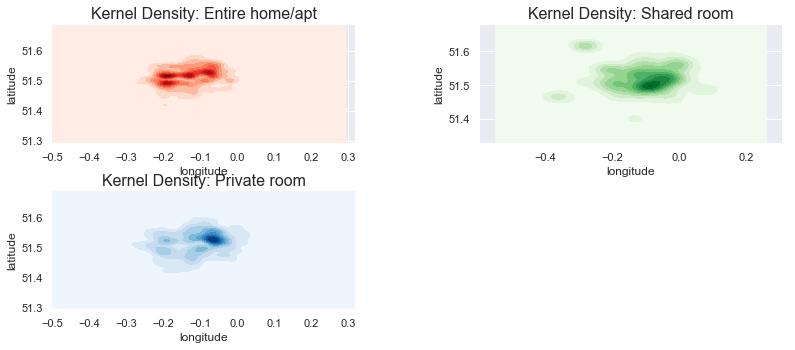

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting base
new_gdb = gpd.GeoSeries(sdf[['longitude', 'latitude']].apply(Point, axis=1), crs="+init=epsg:4326")
bbox = new_gdb.total_bounds
titles=["Kernel Density: "+in_type[i] for i in range(3)]
fig.tight_layout(pad = 0.4, w_pad = 4.0, h_pad = 4.0)

fig, ax = plt.subplots(1,3,figsize=(15,6))

# sets the x and y limits for each function 
# otherwise the density maps will be very small
ax0 = plt.subplot2grid((8,8), (0,0),rowspan=3, colspan=3) 
ax0.set_title(titles[0], fontsize =16)
ax0.set_xlim(bbox[0], bbox[2])
ax0.set_ylim(bbox[1], bbox[3]) 

ax1 = plt.subplot2grid((8,8), (4,0),rowspan=3, colspan=3)
ax1.set_title(titles[1], fontsize =16)
ax1.set_xlim(bbox[0], bbox[2])
ax1.set_ylim(bbox[1], bbox[3]) 

ax2 = plt.subplot2grid((8,8), (0,4),rowspan=3, colspan=3)
ax2.set_title(titles[2], fontsize =16)
ax2.set_xlim(bbox[0], bbox[2])
ax2.set_ylim(bbox[1], bbox[3]) 

gdfnew0 = sdf[sdf['room_type']==in_type[0]]
sns.kdeplot(gdfnew0.longitude, gdfnew0.latitude, shade = True, cmap = 'Reds', ax=ax0) 
gdfnew1 = sdf[sdf['room_type']==in_type[1]]
sns.kdeplot(gdfnew1.longitude, gdfnew1.latitude, shade = True, cmap = 'Blues', ax=ax1)
gdfnew2 = sdf[sdf['room_type']==in_type[2]]
sns.kdeplot(gdfnew2.longitude, gdfnew2.latitude, shade = True, cmap = 'Greens', ax=ax2)

sns.set(style = 'whitegrid') # aesthetics
sns.despine(left=True) # aesthetics
sns.set_context('paper') # aesthetics
plt.axis('equal')
plt.show()   

# Credits!

## Take home work -- GIS realization (Optional)

**Task**: Nearest Neighbour Distances analysis

For ArcGIS user, hints:
- in ArcMap, activate the Spatial Analyst extension (i.e. check that the checkbox next to the Spatial Analysis extension is checked in the “Extension” menu);
- in ArcToolBox, open Spatial Statistics Tools > Analyzing Patterns > Average Nearest Neighbor to carry out NN analysis.
- a report will be produced to explain the distribution of the nearest neighbor distances.

For QGIS user, hints:
- Load the London Pub data (CRS: WGS 84, Authority ID: EPSG:4326). 
- Select from the main menu, Vector -> Analysis Tools -> Distance Matrix….

